Creating a framework to test different classification algorithms for a day trading strategy involves several steps. Below is a high-level framework you can follow, including data preparation, model training, and evaluation. This example assumes you have basic familiarity with Python, pandas, scikit-learn, and other relevant libraries.

### 1. Define Objectives and Metrics
- **Objective**: Determine which classification algorithm performs best for predicting profitable trades.
- **Metrics**: Accuracy, precision, recall, F1-score, profit/loss metrics, and Sharpe ratio.

### 2. Data Collection and Preparation
- **Data Sources**: Historical stock price data, trading volumes, technical indicators (e.g., moving averages, RSI, MACD).
- **Data Features**: Create features that represent market conditions. This may include historical prices, technical indicators, and other relevant features.
- **Target Variable**: Define the target variable for classification, such as whether a trade will be profitable (binary classification) or which direction the price will move (multi-class classification).

```python

```

In [2]:
import pandas as pd

<Axes: xlabel='Date'>

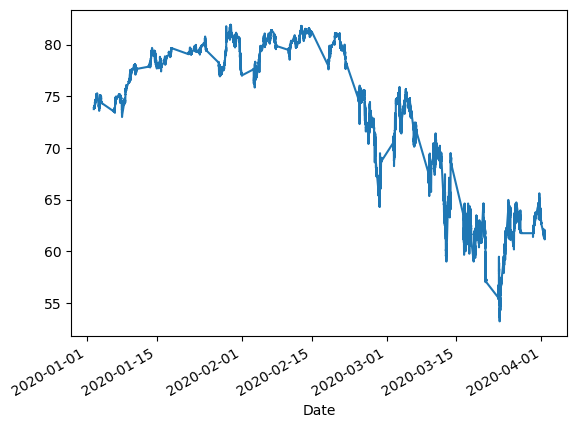

In [4]:
from EquityClasses import EquityClass

AAPL_stock = EquityClass('AAPL' , 'Ticker-SIC-Descriptions-data.csv')

AAPL_stock.fetch_price_history('2020-01-01' , '2024-09-10', tick = 'minute')

AAPL_stock.price_history['Close'].plot()

In [17]:
import time
from datetime import datetime
from dateutil.relativedelta import relativedelta


In [19]:
def compile_data(start, months, ticker,timeout=False):
    eqc = EquityClass(ticker , 'Ticker-SIC-Descriptions-data.csv')
    start = pd.to_datetime(start)
    df = pd.DataFrame()

    for i in range(0,months):    
        end = start + relativedelta(months=1, days=-1)
        end_string = end.strftime('%Y-%m-%d')
        start_string = start.strftime('%Y-%m-%d')
        print(start_string, end_string)

        eqc.fetch_price_history(start_string , end_string, tick = 'hour')
        df_new = eqc.price_history
        df = pd.concat([df, df_new])
    
        start = end + relativedelta(days=1)

        if timeout == False and i == 0:
            print('Delaying loop to remain in API constraints')
            
            
            

    return df
    
    
    

In [20]:
df_data = compile_data('2020-01-01',12*4,'AAPL', timeout = True)

2020-01-01 2020-01-31
2020-02-01 2020-02-29
2020-03-01 2020-03-31
2020-04-01 2020-04-30
2020-05-01 2020-05-31
2020-06-01 2020-06-30
2020-07-01 2020-07-31
2020-08-01 2020-08-31
2020-09-01 2020-09-30
2020-10-01 2020-10-31
2020-11-01 2020-11-30
2020-12-01 2020-12-31
2021-01-01 2021-01-31
2021-02-01 2021-02-28
2021-03-01 2021-03-31
2021-04-01 2021-04-30
2021-05-01 2021-05-31
2021-06-01 2021-06-30
2021-07-01 2021-07-31
2021-08-01 2021-08-31
2021-09-01 2021-09-30
2021-10-01 2021-10-31
2021-11-01 2021-11-30
2021-12-01 2021-12-31
2022-01-01 2022-01-31
2022-02-01 2022-02-28
2022-03-01 2022-03-31
2022-04-01 2022-04-30
2022-05-01 2022-05-31
2022-06-01 2022-06-30
2022-07-01 2022-07-31
2022-08-01 2022-08-31
2022-09-01 2022-09-30
2022-10-01 2022-10-31
2022-11-01 2022-11-30
2022-12-01 2022-12-31
2023-01-01 2023-01-31
2023-02-01 2023-02-28
2023-03-01 2023-03-31
2023-04-01 2023-04-30
2023-05-01 2023-05-31
2023-06-01 2023-06-30
2023-07-01 2023-07-31
2023-08-01 2023-08-31
2023-09-01 2023-09-30
2023-10-01

In [35]:
# compiled_data.to_csv('AAPL_data.csv')

Creating the functions for the individual metrics

In [51]:
df = df_data

In [53]:
df

,v,vw,Open,Close,High,Low,t,n,r_close_as_frac
Date,,,,,,,,,
2020-01-02 09:00:00,104552.0,73.8595,73.7625,73.9325,73.9375,73.7625,1577955600000,191,NaN
2020-01-02 10:00:00,62172.0,73.9869,73.9375,74.0000,74.0125,73.9375,1577959200000,146,0.000913
2020-01-02 11:00:00,59560.0,73.8952,73.9375,73.8775,73.9625,73.8250,1577962800000,163,-0.001655
2020-01-02 12:00:00,537204.0,73.9588,73.8750,74.0250,74.0450,73.7825,1577966400000,1219,0.001997
2020-01-02 13:00:00,863464.0,74.0598,73.9725,74.1701,74.1875,73.8588,1577970000000,2080,0.001960
...,...,...,...,...,...,...,...,...,...
2023-12-29 20:00:00,10090692.0,192.6004,192.4750,192.5200,193.1300,192.0200,1703880000000,98547,0.000260
2023-12-29 21:00:00,1527837.0,192.5302,192.5600,192.3800,192.9550,192.2600,1703883600000,3550,-0.000727
2023-12-29 22:00:00,101502.0,192.3368,192.3702,192.2600,192.5300,192.0000,1703887200000,1170,-0.000624


In [55]:
import pandas as pd

def calculate_RSI(df, column, period=14):
    delta = df[column].diff(1)
    
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    df['RSI'] = rsi
    return df

def calculate_SMA(df, column, period):
    df[f'SMA_{period}'] = df[column].rolling(window=period).mean()
    return df

def calculate_EMA(df, column, span):
    return df[column].ewm(span=span, adjust=False).mean()

def calculate_MACD(df, column, fast_period=12, slow_period=26, signal_period=9):
    df['EMA_Fast'] = calculate_EMA(df, column, fast_period)
    df['EMA_Slow'] = calculate_EMA(df, column, slow_period)
    df['MACD'] = df['EMA_Fast'] - df['EMA_Slow']
    df['Signal_Line'] = df['MACD'].ewm(span=signal_period, adjust=False).mean()
    df['MACD_Histogram'] = df['MACD'] - df['Signal_Line']
    return df

df = calculate_RSI(df, 'Close', period=14)
df = calculate_SMA(df, 'Close', period=5)
df = calculate_MACD(df, 'Close')
df.rename(columns = {'SMA_5':'SMA'}, inplace = True)

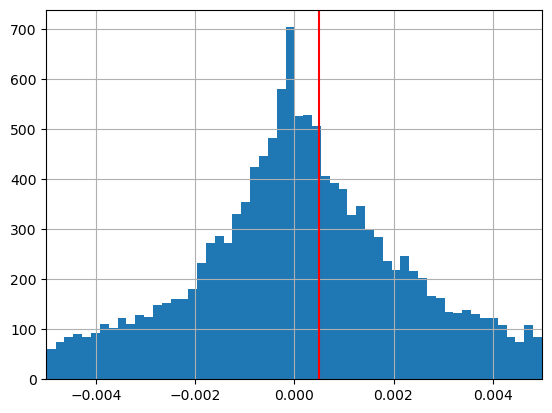

In [57]:
import matplotlib.pyplot as plt
x_data = df['r_close_as_frac']
plt.hist(x_data, bins = 1000)
plt.xlim(-0.005, 0.005)
plt.axvline(0.0005,color = 'red')
plt.grid()
plt.show()


In [118]:
import pandas as pd
import numpy as np

# Load data
data = df

# Feature engineering
#Done above

# Define target variable
data['Target'] = (data['r_close_as_frac'].shift(-1) > data['r_close_as_frac'] +0.005).astype(int)  # Example target

# Drop rows with NaN values
data = data.dropna()

In [120]:
data['Target'].value_counts()[1] /  data['Target'].value_counts().sum()

0.15135810177958164

In [122]:
data['Target'].value_counts()

Target
0    13591
1     2424
Name: count, dtype: int64

In [124]:
data

,v,vw,Open,Close,High,Low,t,n,r_close_as_frac,RSI,SMA,EMA_Fast,EMA_Slow,MACD,Signal_Line,MACD_Histogram,Target
Date,,,,,,,,,,,,,,,,,
2020-01-02 13:00:00,863464.0,74.0598,73.9725,74.1701,74.1875,73.8588,1577970000000,2080,0.001960,74.616660,74.00102,73.981328,73.956921,0.024408,0.006546,0.017862,0
2020-01-02 14:00:00,23912268.0,74.2439,74.1725,74.4925,74.5375,73.7975,1577973600000,50647,0.004347,84.782609,74.11302,74.059970,73.996593,0.063377,0.017912,0.045465,0
2020-01-02 15:00:00,23834188.0,74.4058,74.4975,74.5275,74.6025,74.1488,1577977200000,51603,0.000470,85.416667,74.21852,74.131898,74.035920,0.095978,0.033525,0.062453,0
2020-01-02 16:00:00,16900116.0,74.5544,74.5325,74.6025,74.6875,74.3625,1577980800000,37273,0.001006,86.612022,74.36352,74.204298,74.077889,0.126410,0.052102,0.074307,0
2020-01-02 17:00:00,10129932.0,74.6254,74.6025,74.6752,74.7000,74.5125,1577984400000,25522,0.000974,87.597449,74.49356,74.276745,74.122134,0.154611,0.072604,0.082007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 20:00:00,10090692.0,192.6004,192.4750,192.5200,193.1300,192.0200,1703880000000,98547,0.000260,31.931464,192.32702,192.884753,193.181208,-0.296456,-0.137283,-0.159173,0
2023-12-29 21:00:00,1527837.0,192.5302,192.5600,192.3800,192.9550,192.2600,1703883600000,3550,-0.000727,31.345566,192.33900,192.807098,193.121860,-0.314761,-0.172779,-0.141983,0
2023-12-29 22:00:00,101502.0,192.3368,192.3702,192.2600,192.5300,192.0000,1703887200000,1170,-0.000624,26.323988,192.40000,192.722929,193.058018,-0.335089,-0.205241,-0.129848,0


### 3. Split Data into Training and Testing Sets

In [127]:

from sklearn.model_selection import train_test_split

# Split data
X = data[['SMA', 'RSI', 'MACD']]  # Features
y = data['Target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 4. Define and Train Classification Models
Here’s an example of how to train several classification algorithms:

In [140]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVM': LinearSVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    print(f'{name} Accuracy: {accuracy:.2f}')

RandomForest Accuracy: 0.84
LogisticRegression Accuracy: 0.85


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM Accuracy: 0.85
KNN Accuracy: 0.83


In [142]:
print('yo')

yo


### 5. Evaluate Models Using Additional Metrics

In [145]:

from sklearn.metrics import classification_report, confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{name} Classification Report:')
    print(classification_report(y_test, y_pred))
    print(f'{name} Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))


RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      4085
           1       0.23      0.03      0.06       720

    accuracy                           0.84      4805
   macro avg       0.54      0.51      0.48      4805
weighted avg       0.76      0.84      0.78      4805

RandomForest Confusion Matrix:
[[4008   77]
 [ 697   23]]
LogisticRegression Classification Report:


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      4085
           1       0.00      0.00      0.00       720

    accuracy                           0.85      4805
   macro avg       0.43      0.50      0.46      4805
weighted avg       0.72      0.85      0.78      4805

LogisticRegression Confusion Matrix:
[[4085    0]
 [ 720    0]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      4085
           1       0.00      0.00      0.00       720

    accuracy                           0.85      4805
   macro avg       0.43      0.50      0.46      4805
weighted avg       0.72      0.85      0.78      4805

SVM Confusion Matrix:
[[4085    0]
 [ 720    0]]


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      4085
           1       0.24      0.06      0.10       720

    accuracy                           0.83      4805
   macro avg       0.55      0.51      0.50      4805
weighted avg       0.76      0.83      0.79      4805

KNN Confusion Matrix:
[[3938  147]
 [ 674   46]]


### 6. Backtesting Strategy
To evaluate the profitability of the strategy, simulate trading based on the model’s predictions:

In [216]:

# Assume model is the best-performing model
model = models['KNN']

# Generate trading signals
data['Signal'] = model.predict(X)

# Simulate trading strategy
initial_capital = 1000
data['Position'] = data['Signal'].shift(1)  # Example: Buy/hold/sell signal
data['Daily_Return'] = data['Close'].pct_change() * data['Position']
data['Strategy_Return'] = data['Daily_Return'].cumsum()
total_return = data['Strategy_Return'].iloc[-1]
print(f'Total Strategy Return: ${total_return * initial_capital:.2f}')


Total Strategy Return: $1387.67


/tmp/ipykernel_2545/3103601143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'] = model.predict(X)
/tmp/ipykernel_2545/3103601143.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Position'] = data['Signal'].shift(1)  # Example: Buy/hold/sell signal
/tmp/ipykernel_2545/3103601143.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [217]:
cumret_bench = initial_capital

In [218]:
(data.r_close_as_frac +1).cumprod() * initial_capital

Date
2020-01-02 13:00:00    1001.960149
2020-01-02 14:00:00    1006.315434
2020-01-02 15:00:00    1006.788247
2020-01-02 16:00:00    1007.801418
2020-01-02 17:00:00    1008.783519
                          ...     
2023-12-29 20:00:00    2370.750870
2023-12-29 21:00:00    2369.026866
2023-12-29 22:00:00    2367.549149
2023-12-29 23:00:00    2366.679759
2023-12-30 00:00:00    2366.195807
Name: r_close_as_frac, Length: 16015, dtype: float64

In [222]:
(data['Daily_Return'] +1).cumprod()* initial_capital

Date
2020-01-02 13:00:00            NaN
2020-01-02 14:00:00    1000.000000
2020-01-02 15:00:00    1000.000000
2020-01-02 16:00:00    1000.000000
2020-01-02 17:00:00    1000.000000
                          ...     
2023-12-29 20:00:00    3902.227273
2023-12-29 21:00:00    3902.227273
2023-12-29 22:00:00    3902.227273
2023-12-29 23:00:00    3902.227273
2023-12-30 00:00:00    3902.227273
Name: Daily_Return, Length: 16015, dtype: float64

Text(0.5, 1.0, 'MACD -EMA -RSI -Hourly breakout momentum Strategy, KNN Variant')

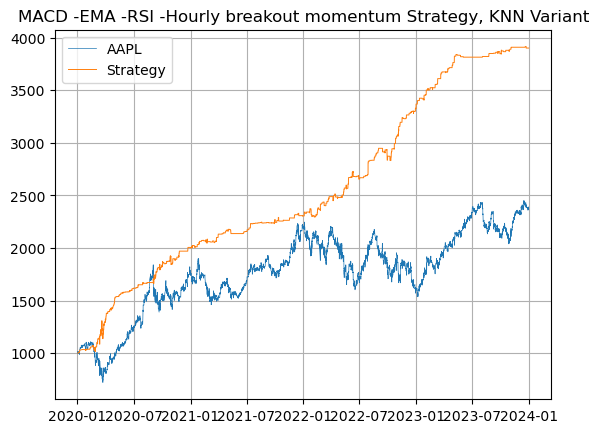

In [224]:
fig,ax = plt.subplots()
ax.plot((data.r_close_as_frac +1).cumprod() * initial_capital, label ='AAPL', lw =0.5)
ax.plot((data['Daily_Return'] +1).cumprod()* initial_capital, label = 'Strategy', lw=0.7)
plt.grid()
ax.legend()
plt.title('MACD -EMA -RSI -Hourly breakout momentum Strategy, KNN Variant')

### 7. Analyze and Optimize
- **Analyze**: Review the performance metrics and backtesting results.
- **Optimize**: Adjust features, target variable, or model hyperparameters to improve performance.

### 8. Documentation and Reporting
- **Document**: Keep track of the methodology, parameters, and results.
- **Report**: Prepare a comprehensive report summarizing the findings and performance of different models.

This framework provides a starting point. You can further refine it by incorporating additional features, trying different models, or using advanced techniques like cross-validation and hyperparameter tuning.

In [ ]:
data['Signal']

In [ ]:
pd.Series(model.predict(X)).value_counts()